## Twitter Sentiment Dataset Analysis

- negative(-1), 
- neutral(0), and 
- positive(+1)

## Dataset Information
- The dataset has three sentiments namely, negative(-1), neutral(0), and positive(+1). 
- It contains two fields for the tweet and label, where label(category) '1' denotes the tweet(clean_text) and '-1' denotes the tweet is not.
- The objective is need to predict the labels on the test datasets.
- For the training models, provide a labelled dataset 162980 tweets. The dataset provided in the form of csv file.
- Im the csv file we have clean_text and category data.

In [133]:
!pip install wordcloud

### Import the Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
#import re      #find a particular pharse and word
#import string  #to get some infomation in the string
import nltk    #natural language processing toolkit 
import warnings
warnings.filterwarnings('ignore')

In [139]:
#load the dataset
df = pd.read_csv('H:/Internship/kaggle/Twitter_Data.csv')

In [142]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [145]:
df.category.nunique()

3

In [148]:
df.category.unique()

array([-1.,  0.,  1., nan])

In [151]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [154]:
df[df['category'].isnull()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [157]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [160]:
df.describe()

,category
count,162969.000000
mean,0.225442
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [163]:
df[df['clean_text'].isnull()]

,clean_text,category


In [166]:
df.drop(df[df['clean_text'].isnull()].index, inplace= True)
df.drop(df[df['category'].isnull()].index, inplace= True)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.8+ MB


## EDA (Exploratory Data Analysis)

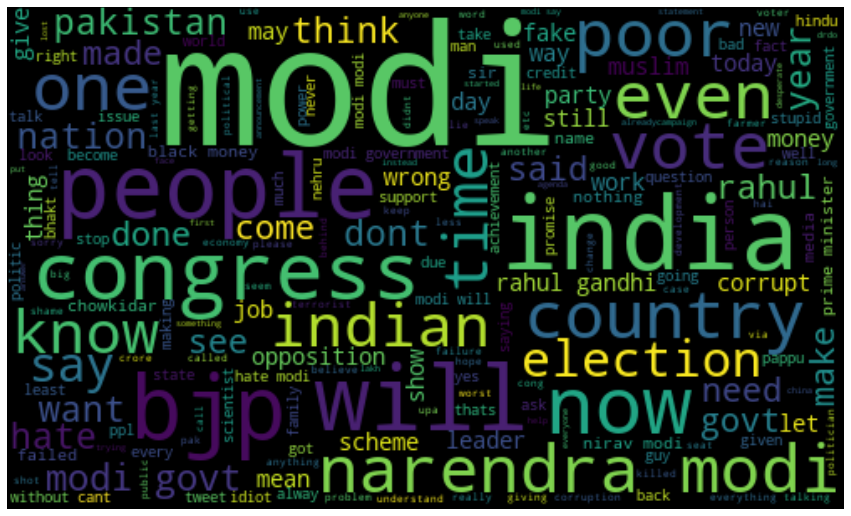

In [210]:
#frequent words Visualization for Negative(-ve) tweets
all_words = ' '.join([sentence for sentence in df['clean_text'][df['category']==-1]])
wordcloud = WordCloud(width=500, height=300, random_state=42, max_font_size=100).generate(all_words)
#plot the graph
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

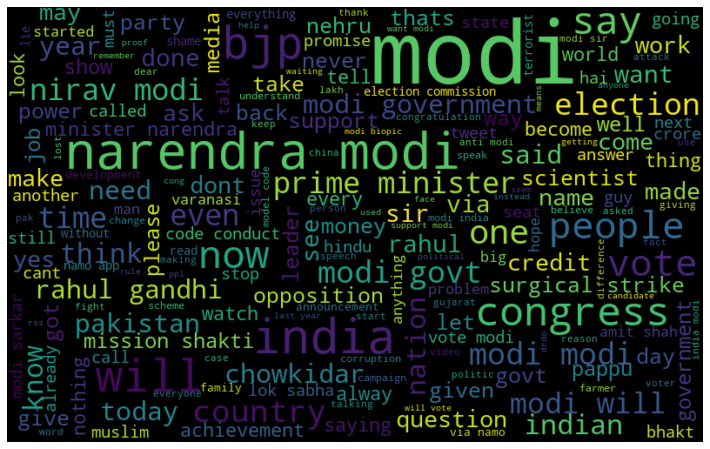

In [214]:
# frequent words Visualization for Positive(+ve) tweets
all_words = " ".join([sentence for sentence in df['clean_text'][df['category']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

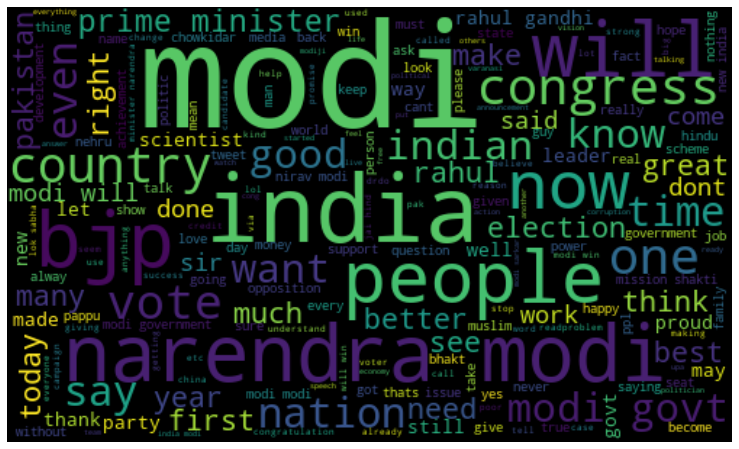

In [225]:
# frequent words Visualization for Positive(+ve) tweets
all_words = ' '.join([sentence for sentence in df['clean_text'][df['category']==1]])
wordcloud = WordCloud(width=500, height=300, random_state=42, max_font_size=100).generate(all_words)
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Split

In [222]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_text'])

In [223]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['category'], random_state=42, test_size=0.25)

## Model Training

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [245]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [250]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred, average = 'micro')

0.7593206194929191

In [249]:
accuracy_score(y_test,pred)

0.11530815109343936

In [251]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred, average = 'micro')

0.11530815109343936

In [247]:
accuracy_score(y_test,pred)

0.7593206194929191

## Thank you